In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
path = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/statement/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]

In [ ]:
file_list_time=[file_list[i].split('-')[0][-4:]+file_list[i].split('-')[1]+file_list[i].split('-')[2][:2] for i in range(len(file_list))]

In [ ]:
repeat_sentence='The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system. Monetary Policy Principles and Practice Review of Monetary Policy Strategy, Tools, and Communications Banking Applications & Legal Developments Reserve Bank Payment Services & Data Financial Market Utilities & Infrastructures Exchange Rates and International Data Micro Data Reference Manual (MDRM) Money Stock and Reserve Balances' 

In [ ]:
statement_text=dict()
for i in range(len(file_list)):
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        if ('Voting for the FOMC monetary policy action were' in line):
          break
        contents.append(line.strip())
  text = ' '.join(contents)
  text=text.replace('Â\xa0',' ')
  text=text.replace(repeat_sentence,"")
  if len(text.split(' '))>100:
    statement_text[file_list_time[i]]='statement '+text
  else:
    print(i,len(text.split(' ')),text)

3 99 Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to increase slightly the degree of pressure on reserve positions. The action is expected to be associated with a small increase in short-term money market interest rates. The decision was taken to move toward a less accommodative stance in monetary policy in order to sustain and enhance the economic expansion. Chairman Greenspan decided to announce this action immediately so as to avoid any misunderstanding of the Committee's purposes, given the fact that this is the first firming of reserve market conditions by the Committee since early 1989.
15 36 Chairman Alan Greenspan announced today that the Federal Reserve will increase slightly the degree of pressure on reserve positions. This action is expected to be associated with a small increase in short-term money market interest rates.
41 71 Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to decrease slightly

In [ ]:
path = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/speech/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]

In [ ]:
file_list_time_speech=[file_list[i].split('-')[0][-4:]+file_list[i].split('-')[1]+file_list[i].split('-')[2][:2] for i in range(len(file_list))]

In [ ]:
speech_dicter={}
path_save = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/text_summarization/speech/"
for i in range(len(file_list)):
  #print(i,file_list[i])
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    #print(line)
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        contents.append(line.strip().replace('Â',' '))
  
  text = ' '.join(contents)
  text=text.replace('Â\xa0',' ')
  text=text.replace(repeat_sentence,"")
  #print(text)
  if (len(text.split(' '))<100):
    print('!',i,text)
  else:
    speech_dicter[file_list_time_speech[i]]='speech '+text

! 84 Reflections on the Capital Goods Overhang
! 104 
! 110 Corporate governance, the subject of our conference, has evolved over the past century to more effectively promote the allocation of the nation s savings to its most productive uses.  And, generally speaking, the resulting structure of business incentives, reporting, and accountability has served us well.  We could not have achieved our current level of national productivity if corporate governance had been deeply flawed.
! 154 
! 159 
! 169 
! 188 
! 205 
! 254 
! 321 Asset Prices and Monetary Policy
! 333 Thank you, Tom.  On behalf of the Federal Reserve, I am pleased to be with you all as we unveil the newly designed $20 note.
! 370 I am pleased to appear once again before the Independent Community Bankers of America.  There can be little doubt that the business environment in which you have operated over the past year has been challenging.
! 406 
! 469 
! 519 Thank you. I am pleased to have the opportunity to help launch 

In [ ]:
import pandas as pd
raw_data_speech=pd.DataFrame({'date':speech_dicter.keys(),'text':speech_dicter.values(),'type':['speech' for i in range(len(speech_dicter.values()))]})
raw_data_speech.sort_values(by='date',inplace=True)
raw_data_speech

,date,text,type
1083,19960613,speech Remarks by Chairman Alan Greenspan Bank...,speech
488,19960618,"speech Remarks by Governor Edward W. Kelley, J...",speech
15,19960908,speech Monetary Policy Objectives and Strategy...,speech
1232,19960919,speech Remarks by Chairman Alan Greenspan Regu...,speech
1236,19961002,speech Remarks by Governor Lawrence B. Lindsey...,speech
...,...,...,...
810,20220221,speech At the American Bankers Association Co...,speech
700,20220224,"speech At the Economic Forecast Project, Univ...",speech
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech


In [ ]:
raw_data_statement=pd.DataFrame({'date':statement_text.keys(),'text':statement_text.values(),'type':['statement' for i in range(len(statement_text.values()))]})
raw_data_statement.sort_values(by='date',inplace=True)
raw_data_statement

,date,text,type
186,19940517,statement The Federal Reserve today announced ...,statement
146,19940816,statement The Federal Reserve announced today ...,statement
177,19941115,statement The Federal Reserve Board today appr...,statement
153,19950201,statement The Federal Reserve Board today appr...,statement
25,19960131,statement The Federal Reserve today announced ...,statement
...,...,...,...
149,20210922,statement For release at 2:00 p.m. EDT The Fe...,statement
88,20211103,statement For release at 2:00 p.m. EDT The Fe...,statement
33,20211215,statement For release at 2:00 p.m. EST The Fe...,statement
66,20220126,statement For release at 2:00 p.m. EST Indica...,statement


In [ ]:
raw_data=pd.concat([raw_data_speech,raw_data_statement],axis=0)
raw_data.sort_values(by='date',inplace=True)
raw_data

,date,text,type
186,19940517,statement The Federal Reserve today announced ...,statement
146,19940816,statement The Federal Reserve announced today ...,statement
177,19941115,statement The Federal Reserve Board today appr...,statement
153,19950201,statement The Federal Reserve Board today appr...,statement
25,19960131,statement The Federal Reserve today announced ...,statement
...,...,...,...
700,20220224,"speech At the Economic Forecast Project, Univ...",speech
188,20220316,statement For release at 2:00 p.m. EDT Indica...,statement
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech


In [ ]:
interest_data=pd.read_csv('/content/gdrive/MyDrive/JPM/Baseline_Model/Interest Rate Spread/US.csv')
def get_date(data):
  data=data.split('-')
  return data[0]+data[1]+data[2]
interest_data.Date=interest_data.Date.apply(get_date)
interest_data.index=interest_data['Date']
interest_data['range']=list(range(len(interest_data)))


In [ ]:
#interest_data.set_index('Date',inplace=True)
interest_data

,Date,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY30y,range
Date,,,,,,,,,,,
19900517,19900517,7.93,8.10,8.24,8.56,8.60,8.69,8.73,8.69,8.65,0
19900518,19900518,8.01,8.16,8.31,8.63,8.69,8.74,8.79,8.75,8.70,1
19900521,19900521,8.02,8.18,8.30,8.61,8.66,8.74,8.77,8.74,8.69,2
19900522,19900522,7.99,8.18,8.22,8.54,8.58,8.66,8.69,8.65,8.61,3
19900523,19900523,7.91,8.11,8.17,8.51,8.55,8.61,8.65,8.61,8.59,4
...,...,...,...,...,...,...,...,...,...,...,...
20220502,20220502,0.90,1.49,2.10,2.73,2.93,3.01,3.04,2.99,3.07,7995
20220503,20220503,0.91,1.45,2.16,2.78,2.95,3.01,3.03,2.97,3.03,7996
20220504,20220504,0.89,1.44,2.07,2.66,2.85,2.93,2.97,2.93,3.01,7997


In [ ]:
interest_data

,Date,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY30y,range
Date,,,,,,,,,,,
19900517,19900517,7.93,8.10,8.24,8.56,8.60,8.69,8.73,8.69,8.65,0
19900518,19900518,8.01,8.16,8.31,8.63,8.69,8.74,8.79,8.75,8.70,1
19900521,19900521,8.02,8.18,8.30,8.61,8.66,8.74,8.77,8.74,8.69,2
19900522,19900522,7.99,8.18,8.22,8.54,8.58,8.66,8.69,8.65,8.61,3
19900523,19900523,7.91,8.11,8.17,8.51,8.55,8.61,8.65,8.61,8.59,4
...,...,...,...,...,...,...,...,...,...,...,...
20220502,20220502,0.90,1.49,2.10,2.73,2.93,3.01,3.04,2.99,3.07,7995
20220503,20220503,0.91,1.45,2.16,2.78,2.95,3.01,3.03,2.97,3.03,7996
20220504,20220504,0.89,1.44,2.07,2.66,2.85,2.93,2.97,2.93,3.01,7997


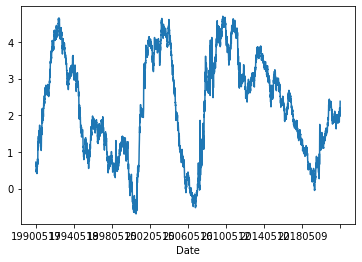

In [ ]:
interest_data['Spread']=interest_data['TRESY30y']-interest_data['TRESY3mo']
interest_data.Spread.plot()

In [ ]:
interest_data[interest_data.Spread<0].tail(30)
#interest_data.Spread.min()

,Date,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY30y,range,Spread
Date,,,,,,,,,,,,
20070411,20070411,5.04,5.10,4.97,4.73,4.66,4.66,4.67,4.74,4.92,4227,-0.12
20070412,20070412,5.03,5.10,4.97,4.73,4.66,4.66,4.67,4.74,4.91,4228,-0.12
20070413,20070413,5.02,5.09,4.98,4.76,4.71,4.68,4.70,4.76,4.93,4229,-0.09
20070416,20070416,5.01,5.09,4.97,4.74,4.68,4.67,4.69,4.74,4.89,4230,-0.12
20070417,20070417,5.01,5.07,4.93,4.68,4.61,4.61,4.62,4.69,4.85,4231,-0.16
20070418,20070418,5.00,5.04,4.91,4.64,4.57,4.56,4.58,4.66,4.81,4232,-0.19
20070419,20070419,4.99,5.04,4.91,4.64,4.58,4.57,4.60,4.68,4.84,4233,-0.15
20070420,20070420,4.99,5.05,4.91,4.64,4.58,4.57,4.60,4.68,4.85,4234,-0.14
20070423,20070423,4.98,5.04,4.90,4.62,4.55,4.55,4.57,4.66,4.83,4235,-0.15


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
raw_data=pd.concat([raw_data_statement,raw_data_speech],axis=0)
raw_data.sort_values(by='date',inplace=True)
eng_stopwords = stopwords.words('english')
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

raw_data['clean_review'] = raw_data.text.apply(clean_text)

In [ ]:
interest_data.Spread

Date
19900517    0.72
19900518    0.69
19900521    0.67
19900522    0.62
19900523    0.68
            ... 
20220502    2.17
20220503    2.12
20220504    2.12
20220505    2.30
20220506    2.38
Name: Spread, Length: 8000, dtype: float64

AttributeError: ignored

In [ ]:
raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_data[interest_data['Date']<=(raw_data.iloc[i,0])]['range'].tail(1))
    #print(index)
    raw_data.iloc[i,-1]=(interest_data.iloc[index+5,-1]-interest_data.iloc[index,-1])/(1+interest_data.iloc[index,-1])
  except:
    pass
new_raw=raw_data.dropna()
new_raw

,date,text,type,clean_review,change
186,19940517,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced two ...,0.030227
146,19940816,statement The Federal Reserve announced today ...,statement,statement federal reserve announced today foll...,0.054795
177,19941115,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,0.028409
153,19950201,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,0.014925
25,19960131,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced foll...,0.116162
...,...,...,...,...,...
700,20220224,"speech At the Economic Forecast Project, Univ...",speech,speech economic forecast project university ca...,-0.033784
188,20220316,statement For release at 2:00 p.m. EDT Indica...,statement,statement release p edt indicators economic ac...,0.000000
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech,speech fed listens helping youth thrive discus...,0.016667
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech,speech chair pro tempore jerome h powell polic...,-0.009967


In [128]:
train=new_raw.head(int(0.75*len(new_raw)))
test=new_raw.tail(int(0.25*len(new_raw)))
train_label=np.array(train.change).reshape(-1,1)
test_label=np.array(test.change).reshape(-1,1)
from sklearn.ensemble import RandomForestRegressor
best_IC=-1
alpha=0
for features in range(2000,3000,100):
  print('############################')
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  #print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0.01
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for ntree in range(10,200,10):
    regressor =RandomForestRegressor(max_depth=1, n_estimators=ntree,random_state=0)
    regressor.fit(train_vsm_tfidf, train_label)
    train_predict=regressor.predict(train_vsm_tfidf)
    test_predict=regressor.predict(test_vsm_tfidf)
    print('train_err',round(mean_squared_error(train_predict, train_label),4),\
          'test_err',round(mean_squared_error(test_predict, test_label),4),'data_variance',round(test_label.var(),4))
    print('train_IC :',round(stats.spearmanr(train_predict,[i[0] for i in train_label])[0],4),
          'P_value :',round(stats.spearmanr(train_predict,[i[0] for i in train_label])[1],4))
    print('test_IC :',round(stats.spearmanr(test_predict,[i[0] for i in test_label])[0],4),
          'P_value :',round(stats.spearmanr(test_predict,[i[0] for i in test_label])[1],4),'alpha ',ntree)
    if stats.spearmanr(test_predict,[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr(test_predict,[i[0] for i in test_label])[0]
      best_alpha=ntree
  print(round(best_IC,4),features,best_alpha)
  print('###################################')

############################
train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1223 P_value : 0.0
test_IC : 0.0899 P_value : 0.0809 alpha  10
train_err 0.0047 test_err 0.003 data_variance 0.003
train_IC : 0.1393 P_value : 0.0
test_IC : 0.0466 P_value : 0.3659 alpha  20
train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1264 P_value : 0.0
test_IC : 0.0314 P_value : 0.5424 alpha  30
train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1251 P_value : 0.0
test_IC : 0.0275 P_value : 0.5935 alpha  40
train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1427 P_value : 0.0
test_IC : 0.0115 P_value : 0.8239 alpha  50
train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1481 P_value : 0.0
test_IC : -0.0044 P_value : 0.932 alpha  60
train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1345 P_value : 0.0
test_IC : -0.0078 P_value : 0.8796 alpha  70
train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.12

KeyboardInterrupt: ignored

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
best_IC=-1
alpha=0
for features in range(1000,3000,100):
  print('############################')
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  #print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0.01
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for alpha in range(1,50,10):
    clf = RidgeCV(alphas=alpha)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print('train_err',round(mean_squared_error(train_predict, train_label),4),\
          'test_err',round(mean_squared_error(test_predict, test_label),4),'data_variance',round(test_label.var(),4))
    print('train_IC :',round(stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label])[0],4),
          'P_value :',round(stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label])[1],4))
    print('test_IC :',round(stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0],4),
          'P_value :',round(stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[1],4),'alpha ',alpha)
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=alpha
  print(round(best_IC,4),features,best_alpha)
  print('###################################')

############################
train_err 0.0032 test_err 0.0038 data_variance 0.0036
train_IC : 0.5243 P_value : 0.0
test_IC : 0.0708 P_value : 0.2198 alpha  1
train_err 0.0044 test_err 0.0036 data_variance 0.0036
train_IC : 0.3362 P_value : 0.0
test_IC : 0.0696 P_value : 0.2279 alpha  11
train_err 0.0045 test_err 0.0036 data_variance 0.0036
train_IC : 0.2859 P_value : 0.0
test_IC : 0.0631 P_value : 0.2746 alpha  21
train_err 0.0046 test_err 0.0036 data_variance 0.0036
train_IC : 0.2582 P_value : 0.0
test_IC : 0.0578 P_value : 0.317 alpha  31
train_err 0.0046 test_err 0.0036 data_variance 0.0036
train_IC : 0.2404 P_value : 0.0
test_IC : 0.0551 P_value : 0.34 alpha  41
0.0708 1000 1
###################################
############################
train_err 0.0032 test_err 0.0038 data_variance 0.0036
train_IC : 0.5331 P_value : 0.0
test_IC : 0.0621 P_value : 0.2823 alpha  1
train_err 0.0043 test_err 0.0036 data_variance 0.0036
train_IC : 0.3437 P_value : 0.0
test_IC : 0.0633 P_value : 0.27

In [ ]:
raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_data[interest_data['Date']<=(raw_data.iloc[i,0])]['range'].tail(1))
    #print(index)
    raw_data.iloc[i,-1]=(interest_data.iloc[index+10,-1]-interest_data.iloc[index,-1])/(1+interest_data.iloc[index,-1])
  except:
    pass
new_raw=raw_data.dropna()
new_raw

,date,text,type,clean_review,change
186,19940517,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced two ...,0.035264
146,19940816,statement The Federal Reserve announced today ...,statement,statement federal reserve announced today foll...,0.030137
177,19941115,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,-0.071023
153,19950201,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,-0.014925
25,19960131,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced foll...,0.075758
...,...,...,...,...,...
700,20220224,"speech At the Economic Forecast Project, Univ...",speech,speech economic forecast project university ca...,0.010135
188,20220316,statement For release at 2:00 p.m. EDT Indica...,statement,statement release p edt indicators economic ac...,-0.029801
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech,speech fed listens helping youth thrive discus...,-0.030000
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech,speech chair pro tempore jerome h powell polic...,-0.063123


In [ ]:
train=new_raw.head(int(0.8*len(new_raw)))
test=new_raw.tail(int(0.2*len(new_raw)))
train_label=np.array(train.change).reshape(-1,1)
test_label=np.array(test.change).reshape(-1,1)

In [ ]:
best_IC=-1
alpha=0
for features in range(1000,3000,100):
  print('############################')
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  #print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0.01
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for alpha in range(1,50,10):
    clf = RidgeCV(alphas=alpha)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print('train_err',round(mean_squared_error(train_predict, train_label),4),\
          'test_err',round(mean_squared_error(test_predict, test_label),4),'data_variance',round(test_label.var(),4))
    print('train_IC :',round(stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label])[0],4),
          'P_value :',round(stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label])[1],4))
    print('test_IC :',round(stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0],4),
          'P_value :',round(stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[1],4),'alpha ',alpha)
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=alpha
  print(round(best_IC,4),features,best_alpha)
  print('###################################')

############################
train_err 0.0101 test_err 0.0084 data_variance 0.0077
train_IC : 0.4769 P_value : 0.0
test_IC : 0.0425 P_value : 0.4615 alpha  1
train_err 0.0139 test_err 0.0077 data_variance 0.0077
train_IC : 0.3104 P_value : 0.0
test_IC : 0.0676 P_value : 0.2415 alpha  11
train_err 0.0144 test_err 0.0077 data_variance 0.0077
train_IC : 0.2785 P_value : 0.0
test_IC : 0.0658 P_value : 0.2543 alpha  21
train_err 0.0146 test_err 0.0077 data_variance 0.0077
train_IC : 0.2614 P_value : 0.0
test_IC : 0.0637 P_value : 0.27 alpha  31
train_err 0.0147 test_err 0.0077 data_variance 0.0077
train_IC : 0.2503 P_value : 0.0
test_IC : 0.0625 P_value : 0.2787 alpha  41
0.0676 1000 11
###################################
############################
train_err 0.01 test_err 0.0085 data_variance 0.0077
train_IC : 0.4813 P_value : 0.0
test_IC : 0.03 P_value : 0.6031 alpha  1
train_err 0.0139 test_err 0.0077 data_variance 0.0077
train_IC : 0.3131 P_value : 0.0
test_IC : 0.0581 P_value : 0.3143

In [ ]:
new_raw_data=raw_data[raw_data['type']=='statement']


In [ ]:
new_raw_data

,date,text,type,clean_review,change
186,19940517,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced two ...,0.035264
146,19940816,statement The Federal Reserve announced today ...,statement,statement federal reserve announced today foll...,0.030137
177,19941115,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,-0.071023
153,19950201,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,-0.014925
25,19960131,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced foll...,0.075758
...,...,...,...,...,...
149,20210922,statement For release at 2:00 p.m. EDT The Fe...,statement,statement release p edt federal reserve commit...,0.081851
88,20211103,statement For release at 2:00 p.m. EDT The Fe...,statement,statement release p edt federal reserve commit...,-0.010169
33,20211215,statement For release at 2:00 p.m. EST The Fe...,statement,statement release p est federal reserve commit...,0.024911
66,20220126,statement For release at 2:00 p.m. EST Indica...,statement,statement release p est indicators economic ac...,0.006734


In [ ]:
new_raw_data['change']=np.nan
for i in range(len(new_raw_data)):
  try:
    index=int(interest_data[interest_data['Date']<=(new_raw_data.iloc[i,0])]['range'].tail(1))
    #print(index)
    new_raw_data.iloc[i,-1]=interest_data.iloc[index+40,-1]#-interest_data.iloc[index,-1])/(1+interest_data.iloc[index,-1])
  except:
    pass
new_raw=new_raw_data.dropna()
new_raw

,date,text,type,clean_review,change
186,19940517,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced two ...,3.13
146,19940816,statement The Federal Reserve announced today ...,statement,statement federal reserve announced today foll...,2.79
177,19941115,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,2.08
153,19950201,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,1.55
25,19960131,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced foll...,1.54
...,...,...,...,...,...
141,20210728,statement For release at 2:00 p.m. EDT The Fe...,statement,statement release p edt federal reserve commit...,1.89
149,20210922,statement For release at 2:00 p.m. EDT The Fe...,statement,statement release p edt federal reserve commit...,1.86
88,20211103,statement For release at 2:00 p.m. EDT The Fe...,statement,statement release p edt federal reserve commit...,1.93
33,20211215,statement For release at 2:00 p.m. EST The Fe...,statement,statement release p est federal reserve commit...,1.88


In [ ]:
train=new_raw.head(int(0.65*len(new_raw)))
test=new_raw.tail(int(0.35*len(new_raw)))
train_label=np.array(train.change).reshape(-1,1)
test_label=np.array(test.change).reshape(-1,1)

In [ ]:
best_IC=-1
alpha=0
for features in range(1000,3000,100):
  print('############################')
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  #print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0.01
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for alpha in range(1,20,1):
    clf = RidgeCV(alphas=alpha)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print('train_err',round(mean_squared_error(train_predict, train_label),4),\
          'test_err',round(mean_squared_error(test_predict, test_label),4),'data_variance',round(test_label.var(),4))
    print('train_IC :',round(stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label])[0],4),
          'P_value :',round(stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label])[1],4))
    print('test_IC :',round(stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0],4),
          'P_value :',round(stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[1],4),'alpha ',alpha)
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=alpha
  print(round(best_IC,4),features,best_alpha)
  print('###################################')

############################
train_err 0.0394 test_err 0.0215 data_variance 0.0164
train_IC : 0.7927 P_value : 0.0
test_IC : -0.3222 P_value : 0.0061 alpha  1
train_err 0.0563 test_err 0.0198 data_variance 0.0164
train_IC : 0.706 P_value : 0.0
test_IC : -0.3072 P_value : 0.0092 alpha  2
train_err 0.0656 test_err 0.0191 data_variance 0.0164
train_IC : 0.6521 P_value : 0.0
test_IC : -0.2891 P_value : 0.0145 alpha  3
train_err 0.0715 test_err 0.0187 data_variance 0.0164
train_IC : 0.6164 P_value : 0.0
test_IC : -0.262 P_value : 0.0273 alpha  4
train_err 0.0757 test_err 0.0184 data_variance 0.0164
train_IC : 0.5975 P_value : 0.0
test_IC : -0.226 P_value : 0.0581 alpha  5
train_err 0.0789 test_err 0.0183 data_variance 0.0164
train_IC : 0.578 P_value : 0.0
test_IC : -0.1965 P_value : 0.1004 alpha  6
train_err 0.0814 test_err 0.0181 data_variance 0.0164
train_IC : 0.568 P_value : 0.0
test_IC : -0.188 P_value : 0.1164 alpha  7
train_err 0.0833 test_err 0.0181 data_variance 0.0164
train_IC : 0.